In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/Toufic01/diabatics/main/Diabatics/diabete.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(70692, 18)

In [10]:
data.duplicated().sum()

6672

In [12]:
data = data.drop_duplicates()

In [13]:
data['Diabetes'].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

In [14]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [18]:
x = data.drop('Diabetes', axis=1)
y = data[['Diabetes']]

In [21]:
x,y = random.fit_resample(x,y)

In [22]:
y.value_counts()

Diabetes
0.0         33398
1.0         33398
Name: count, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y , random_state = 42 ,test_size = .30)

In [28]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
dtc.score(xtrain , ytrain)

0.9795752507645914

In [39]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

In [40]:
cm = confusion_matrix(ytest , dtc.predict(xtest))
cm

array([[6609, 3316],
       [3832, 6282]], dtype=int64)

<Axes: >

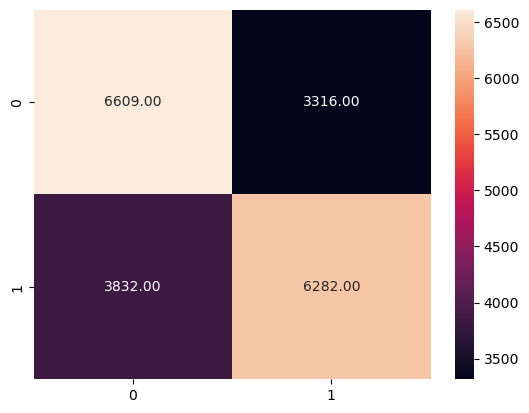

In [41]:
sn.heatmap(cm , annot = True ,fmt = '.2f')

In [42]:
print(classification_report(ytest , dtc.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      9925
         1.0       0.65      0.62      0.64     10114

    accuracy                           0.64     20039
   macro avg       0.64      0.64      0.64     20039
weighted avg       0.64      0.64      0.64     20039



In [44]:
accuracy_score(ytest , dtc.predict(xtest))

0.6432955736314188

In [49]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lr = LogisticRegression()

In [50]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [51]:
lr.score(xtrain, ytrain)

0.7317834762709327

In [64]:
lr.score(xtest, ytest)

0.7284295623534108

In [65]:
accuracy_score(ytest , lr.predict(xtest))

0.7284295623534108

In [66]:
cm2 = confusion_matrix(ytest , lr.predict(xtest))
cm2

array([[7052, 2873],
       [2569, 7545]], dtype=int64)

<Axes: >

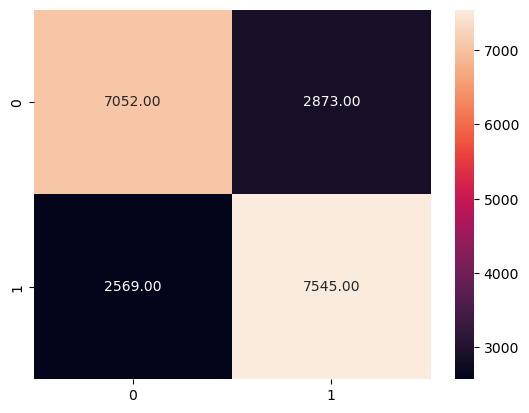

In [67]:
sn.heatmap(cm2 , annot = True ,fmt = '.2f')

In [68]:
print(classification_report(ytest , lr.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      9925
         1.0       0.72      0.75      0.73     10114

    accuracy                           0.73     20039
   macro avg       0.73      0.73      0.73     20039
weighted avg       0.73      0.73      0.73     20039

